Q1 - Download any dataset with numeric values to plot the histogram as per the values given by the user: I am using Iris datatset here.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('IRIS.csv')

In [3]:
print("Preview of dataset:")
print(df.head())


Preview of dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("\nAvailable numeric columns for histogram:")
for i, col in enumerate(numeric_cols, start=1):
    print(f"{i}. {col}")


Available numeric columns for histogram:
1. sepal_length
2. sepal_width
3. petal_length
4. petal_width


In [5]:
column = input("\nEnter the column name to plot histogram: ").strip()


In [6]:
# Validate column name
while column not in numeric_cols:
    print("❌ Invalid column name. Please enter one from the list above.")
    column = input("Enter the column name to plot histogram: ").strip()

In [7]:
x_edges = list(map(float, input("Enter x-axis bin edges (comma separated, or leave blank to skip): ").split(","))) if input("Do you want to specify custom bin edges? (y/n): ").lower() == 'y' else []
bins = int(input("Enter number of bins: "))
bar_color = input("Enter bar color (e.g., blue, green, red): ")
edge_color = input("Enter edge color (e.g., black, white): ")
alpha = float(input("Enter transparency value (0-1): "))

multi_color = input("Do you want different colors for each bar? (y/n): ").lower()
if multi_color == 'y':
    colors = input("Enter colors for each bar (comma separated): ").split(',')
else:
    colors = [bar_color] * bins

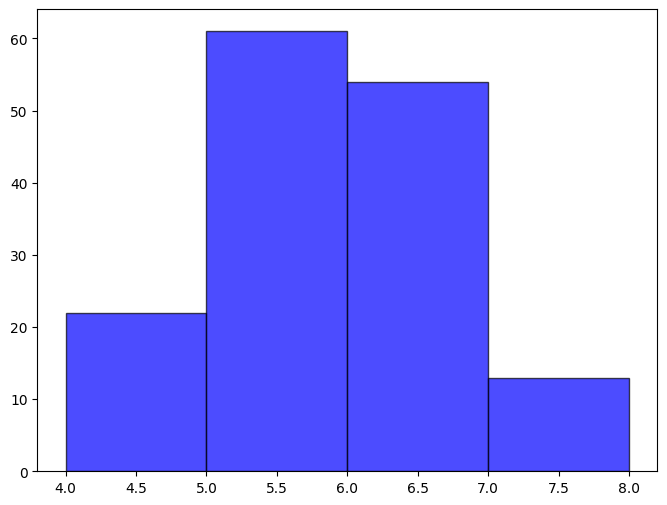

In [8]:
# ---- Plot Histogram ----
plt.figure(figsize=(8, 6))
counts, bins_edges, patches = plt.hist(df[column],
                                       bins=x_edges if len(x_edges) > 1 else bins,
                                       color=bar_color,
                                       edgecolor=edge_color,
                                       alpha=alpha)

In [9]:
# Apply custom colors if specified
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

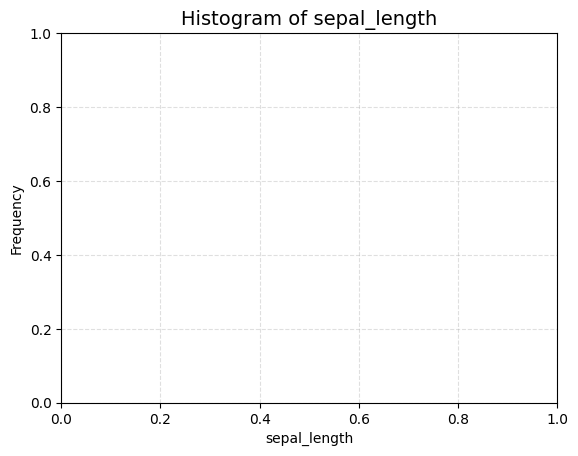

In [10]:
plt.title(f"Histogram of {column}", fontsize=14)
plt.xlabel(column)
plt.ylabel("Frequency")
plt.grid(alpha=0.4, linestyle='--')
plt.show()